In [124]:
import sys
sys.path.append("../")
from cloude import read_mueller_matrix_from_file, reshape_matrix_into_dataframe, cloude_decomposition
from scipy.signal import savgol_filter

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
MM = pd.read_csv('Wafer_MM_70.txt', sep='\s+', index_col=0)
MM.index.name = 'Wavelength'
MM.columns = ['M11', 'M12', 'M13', 'M14',
              'M21', 'M22', 'M23', 'M24',
              'M31', 'M32', 'M33', 'M34',
              'M41', 'M42', 'M43', 'M44']

In [126]:
#MM = read_mueller_matrix_from_file('Al2O3_smooth_back_MM.txt')
#MM = MM.apply(lambda x: savgol_filter(x, 51, 2))
reshaped_mm = MM.values.reshape(-1, 4, 4)
MM_cloude = cloude_decomposition(reshaped_mm, cut_off=0)
Mdf_cloude = reshape_matrix_into_dataframe(MM, MM_cloude)

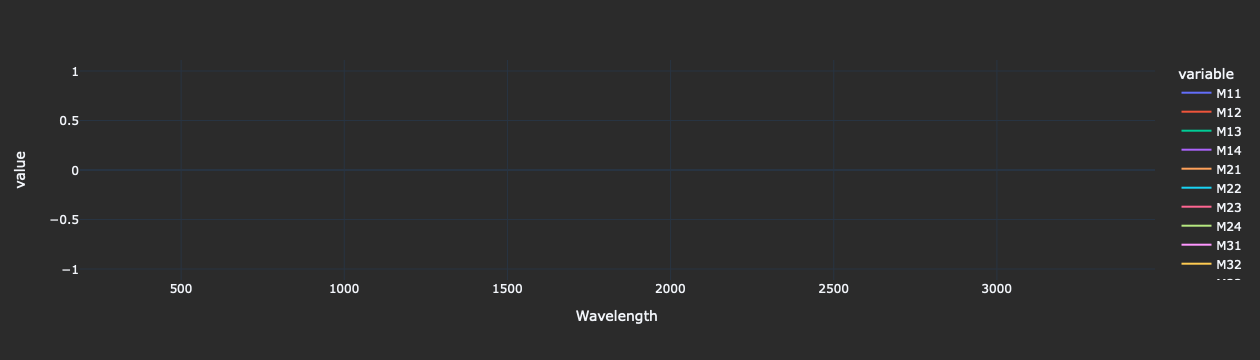

In [127]:
MM.plot()

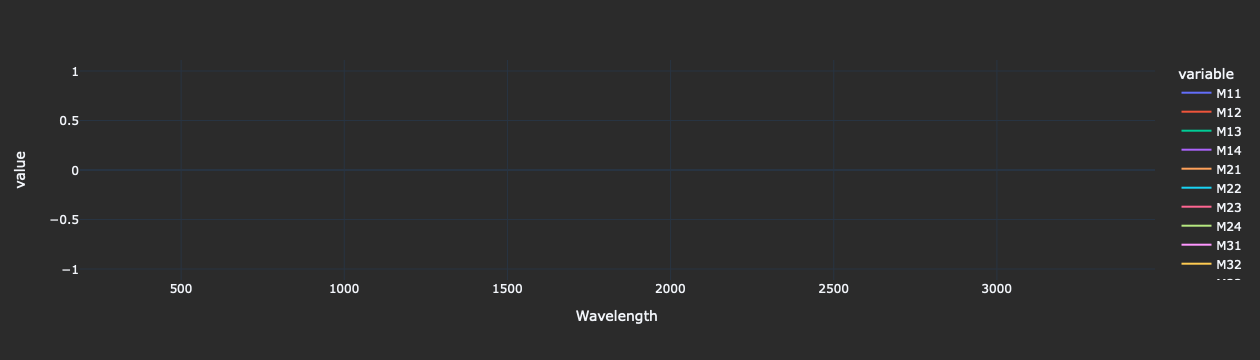

In [128]:
Mdf_cloude.plot()

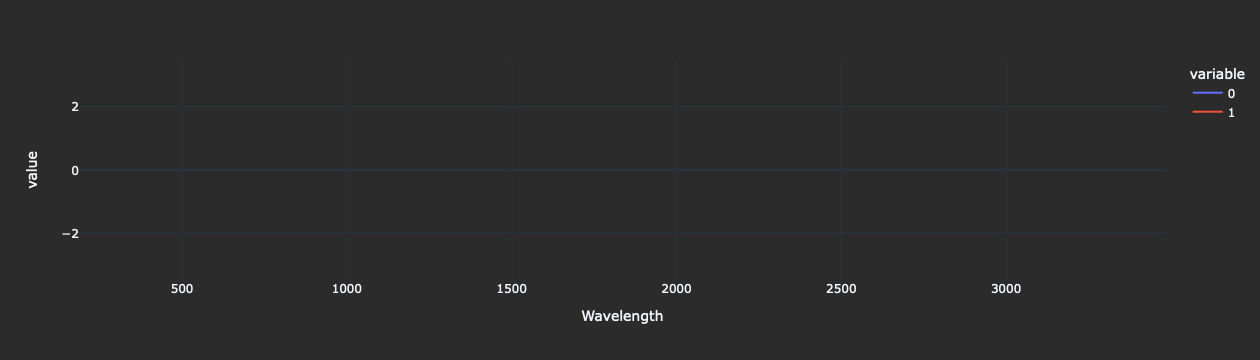

In [129]:
N = -Mdf_cloude.loc[:,['M12', 'M21']].mean(axis=1)
C = Mdf_cloude.loc[:,'M33']
S = Mdf_cloude.loc[:,'M34']

Ψ = (C + 1j * S / (1 + N)).apply(lambda x: np.arctan(np.abs(x)))
Δ = (C + 1j * S / (1 + N)).apply(lambda x: np.angle(x))

pd.concat([Ψ, Δ], axis=1).plot()

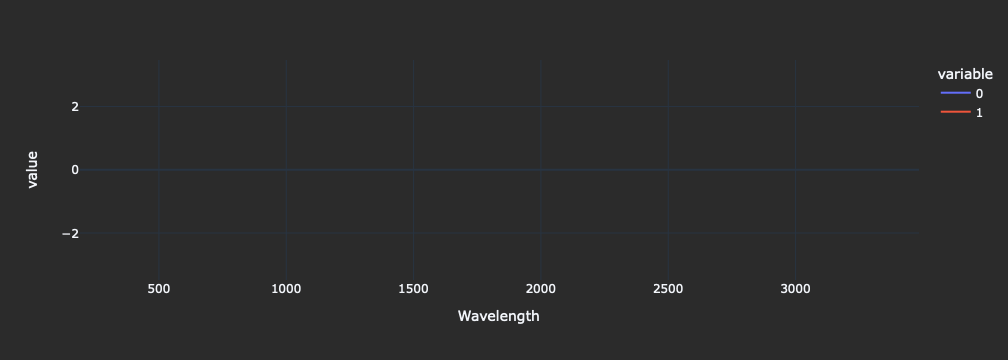

In [120]:
N = -MM.loc[:,['M12', 'M21']].mean(axis=1)
C = MM.loc[:,'M33']
S = (MM.loc[:,'M34'] - MM.loc[:,'M43'])/2

Ψ = (C + 1j * S / (1 + N)).apply(lambda x: np.arctan(np.abs(x)))
Δ = (C + 1j * S / (1 + N)).apply(lambda x: np.angle(x))

pd.concat([Ψ, Δ], axis=1).plot()